# Why Should we Use Feature Scaling?

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it.

like:-

1. Linear Regression---Gradient Descent ----Global Minima

2. Algorithms like KNN,K Means,SVM,Hierarichal Clustering--- Eucledian Distance

3. Deep Learning Techniques(Standardization, Scaling)

    1.ANN--->GLobal Minima, Gradient

    2.CNN

    3.RNN



# What is Normalization?

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

Here’s the formula for normalization:

Normalization equation

Here, Xmax and Xmin are the maximum and the minimum values of the feature respectively.

When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0
On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1
If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1

# What is Standardization?

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Here’s the formula for standardization:

Standardization equation

Feature scaling: Mu is the mean of the feature values and Feature scaling: Sigma is the standard deviation of the feature values. Note that in this case, the values are not restricted to a particular range.

Now, the big question in your mind must be when should we use normalization and when should we use standardization? Let’s find out!

# The Big Question – Normalize or Standardize?
Normalization vs. standardization is an eternal question among machine learning newcomers. Let me elaborate on the answer in this section.

Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.
However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.

It is a good practice to fit the scaler on the training data and then use it to transform the testing data. This would avoid any data leakage during the model testing process. Also, the scaling of target values is generally not required.

#### Types Of Transformation
1.  Standardization
2.  Normalization 
3.  Guassian or Normalization Transformation

   a. Logarithmic Transformation
    
   b. Reciprocal Trnasformation

   c. Square Root Transformation
    
   d. Exponential Trnasformation

   e. Box Cox Transformation

##### Standardization
We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.
z=(x-x_mean)/std

In [4]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()


,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [5]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [6]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [10]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()
### fit vs fit_transform
df_scaled=scaler.fit_transform(df)

In [12]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

##### Min Max Scaling  (### CNN)---Deep Learning Techniques
Min Max Scaling scales the values between 0 to 1.
X_scaled = (X - X.min / (X.max - X.min)

In [13]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


#### Guassian Transformation

Some machine learning algorithms like linear and logistic assume that the features are normally distributed
-Accuracy
-Performance
- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation


In [14]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
### fillnan
df['Age']=df['Age'].fillna(df['Age'].median())

In [16]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [21]:
import scipy.stats as stat
import pylab 
import matplotlib.pyplot as plt

In [22]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

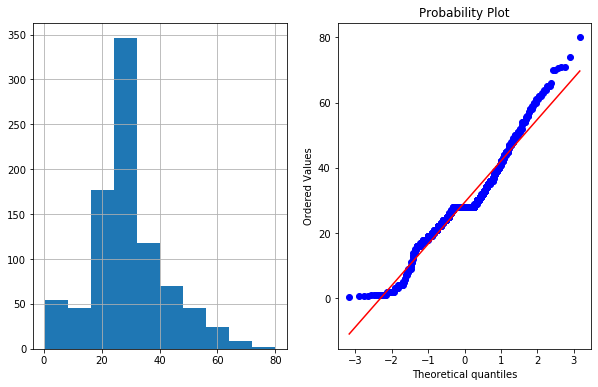

In [23]:
plot_data(df,'Age')

#### Logarithmic Transformation

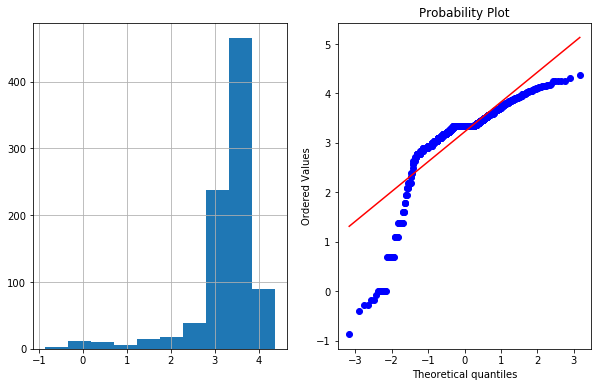

In [24]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

#### Reciprocal Trnasformation

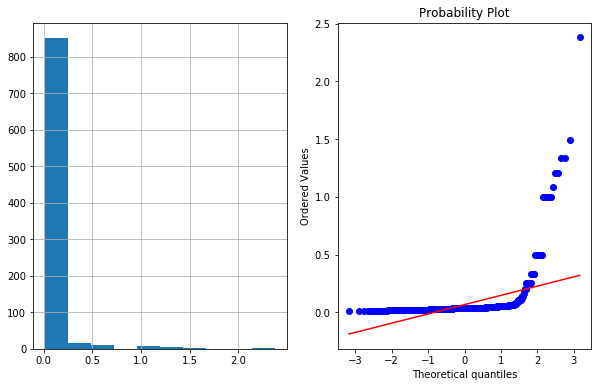

In [25]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

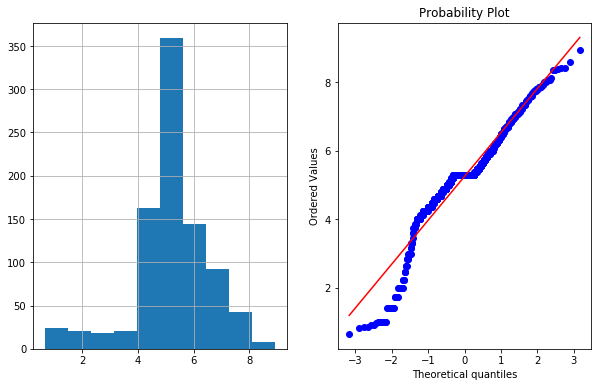

In [26]:
##### Square Root Transformation
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

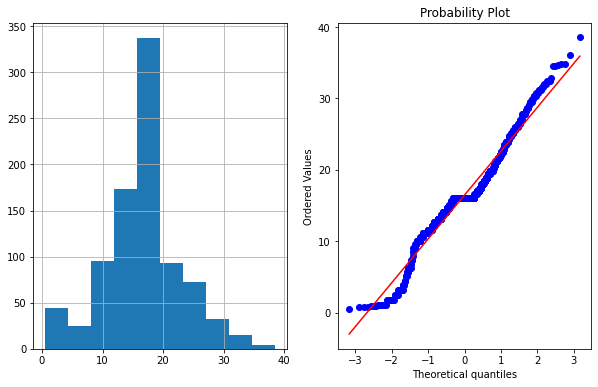

In [44]:
#### Exponential Transdormation
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

#### BoxCOx Transformation
The Box-Cox transformation is defined as: 

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

In [27]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

In [28]:
print(parameters)

0.7964531473656952


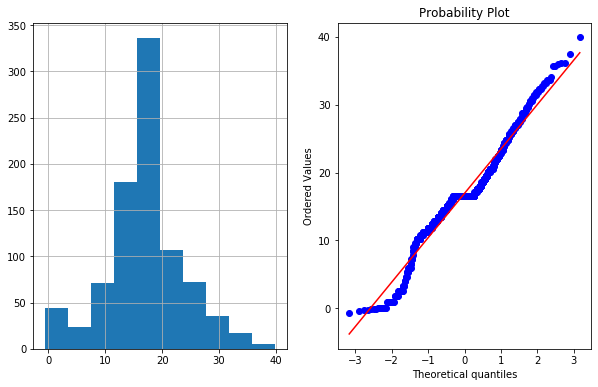

In [30]:
plot_data(df,'Age_Boxcox')

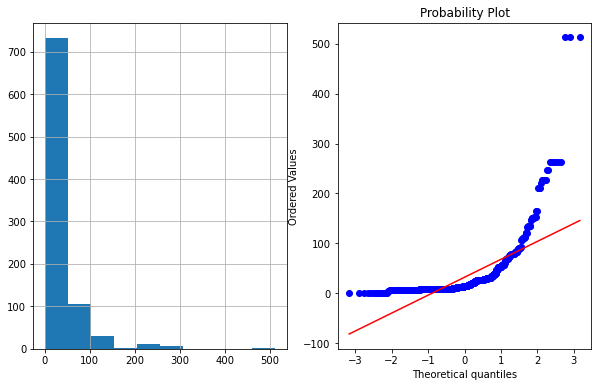

In [51]:
plot_data(df,'Fare')

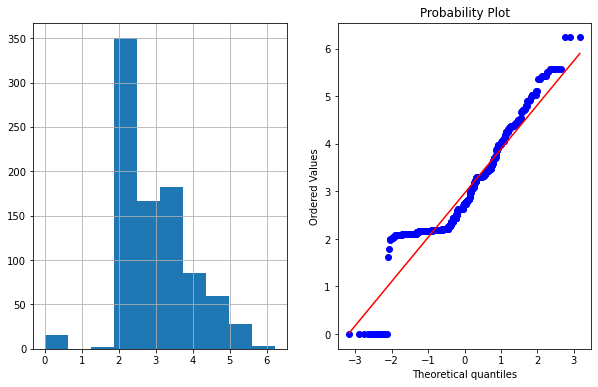

In [50]:
#### Fare
df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')

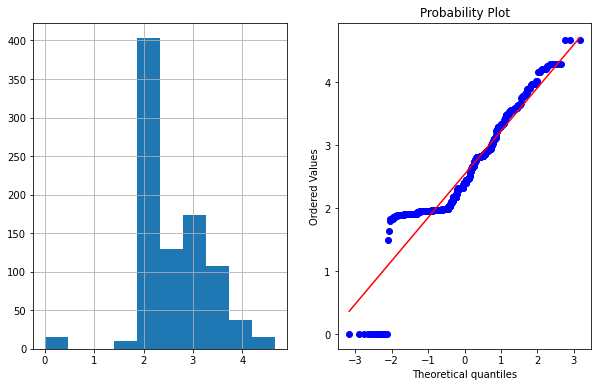

In [53]:
df['Fare_Boxcox'],parameters=stat.boxcox(df['Fare']+1)
plot_data(df,'Fare_Boxcox')